In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
fdir = '/data2/GBT/S140/'

In [4]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p, hits, ra_bins, dec_bins

In [5]:
def mad(x, axis=None):
    return np.nanmedian(np.abs(x - np.nanmedian(x, axis)), axis)

In [8]:
fnames = glob.glob(fdir+'Daisy/*/*_03_*A*rfireduced.npz')
fnames.sort()

In [28]:
nz = np.load(fnames[2])
ra = nz['sra']
dec = nz['sdec']
mask = nz['valid']
az = nz['AZIMUTH'][::8]
el = nz['ELEVATIO'][::8]


In [32]:
print len(az)

7081


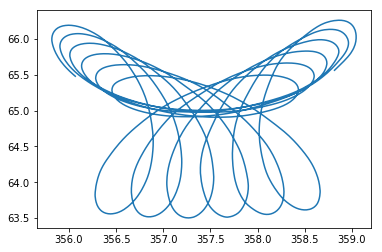

In [31]:
plot(az, el)

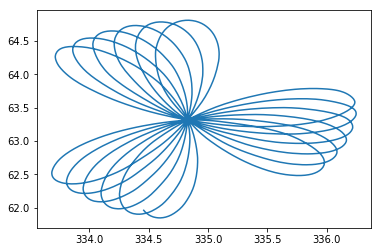

In [11]:
plot(ra, dec)

In [6]:
def get_data(bank="A"):
    fnames = glob.glob(fdir+'Daisy/*/*_03_*'+bank+'*rfireduced.npz')
    fnames.sort()
    fdiode, pdiode = np.load('../calibrations/lownoise_calibration_3C295_03_'+bank+'.npy')
    calibrated = [] 
    ras = []
    decs = []
    meansub = []
    azs = []
    els = []
    for fname in fnames:
        nz = np.load(fname)
        ra = nz['sra']
        dec = nz['sdec']
        mask = nz['valid']
        az = nz['AZIMUTH'][::8]
        el = nz['ELEVATIO'][::8]

        gain = pdiode / ( nz['xxon'] - nz['xxoff'])
        ratio = nz['xxoff'] / nz['xxon']
        calibd = nz['xxoff'] * gain

        sigma = np.sqrt(2.) / np.sqrt(1500.e6 / 512. * 0.02)
        noiseratio = ratio.std(0) / ratio.mean(0)
        bad = noiseratio > ( 1.25 * sigma )
        mask[bad] = False
        gainmedian = np.nanmedian(np.nanmean(gain[:, mask], 1))
        gainmad = mad(np.nanmean(gain[:, mask], 1))
        tmask = np.abs(np.nanmean(gain[:, mask], 1) - gainmedian) < (6. * gainmad)

        calibd = calibd[tmask,:][:,mask]
        #cleandata_tod = np.nanmean(calibd - np.nanmedian(calibd,0), 1)

        calibrated = np.concatenate([calibrated, np.nanmean(calibd - np.nanmedian(calibd,0), 1)])
        meansub = np.concatenate([meansub, np.nanmean(calibd,1) - np.nanmedian(np.nanmean(calibd,1))])
        ras = np.concatenate([ras, ra[tmask]])
        decs = np.concatenate([decs, dec[tmask]])
        azs = np.concatenate([azs, az])
        els = np.concatenate([els, el])
    return calibrated, meansub, ras, decs, azs, els

In [7]:
calibrated, meansub, ras, decs, azs, els = get_data('A')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in greater


In [62]:
azs[(azs < 300) & (azs > 100)] = np.nan

In [63]:
azs[azs < 50] = azs[azs < 50] + 360.

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


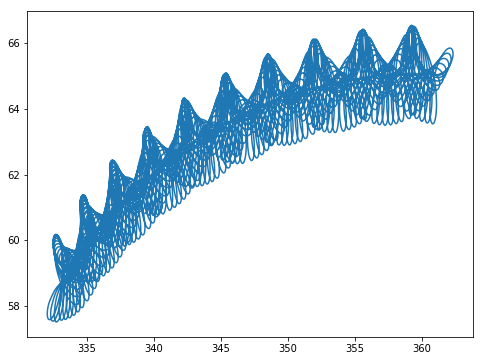

In [64]:
plot(azs, els)

In [67]:
len(azs) / (2.0 * 24.75 * 60.0) / 25.

2.247919191919192

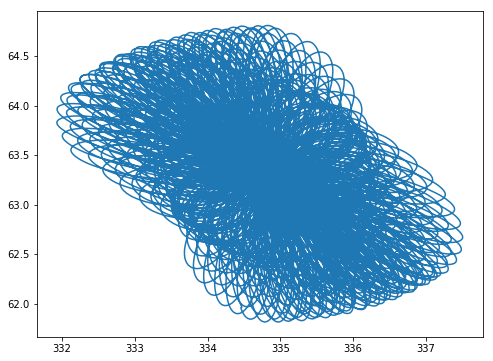

In [68]:
plot(ras, decs)

In [ ]:
2.0 * 24.75 * 60.0

In [40]:
print len(ras) * 0.04

6671.44


In [42]:
6671 / 3600.

1.8530555555555555

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide
/usr/lib64/python2.7/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


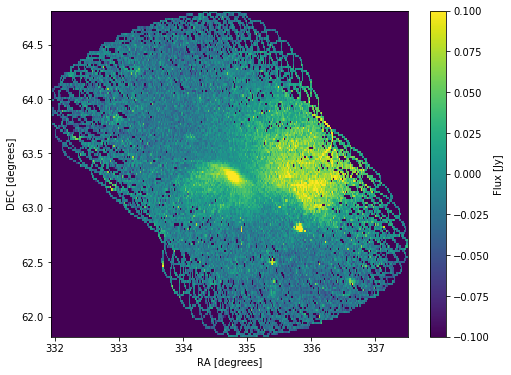

In [33]:
calibrated, meansub, ras, decs = get_data('A')
datamap, hits, rabins, decbins = naive_map(meansub, ras, decs, 300, 150)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = np.nan
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

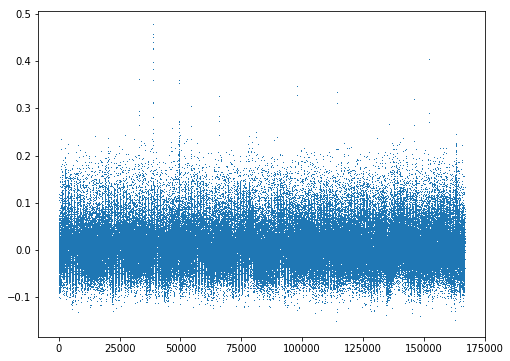

In [41]:
plot(calibrated, ',')

In [39]:
powers, f = mlab.psd(calibrated, NFFT=len(calibrated))

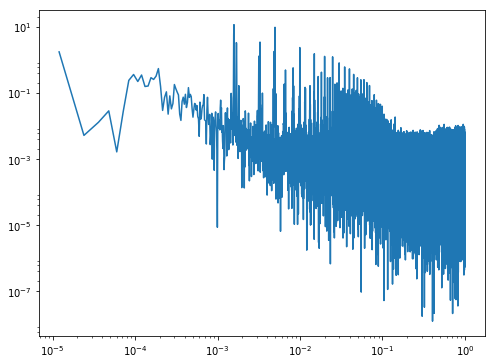

In [40]:
loglog(f, powers)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


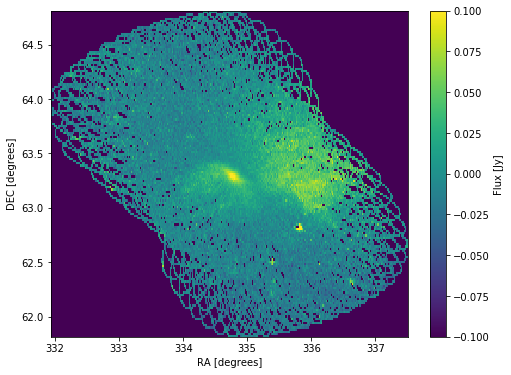

In [11]:
calibrated, meansub, ras, decs = get_data('B')
datamap, hits, rabins, decbins = naive_map(meansub, ras, decs, 300, 150)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = np.nan
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


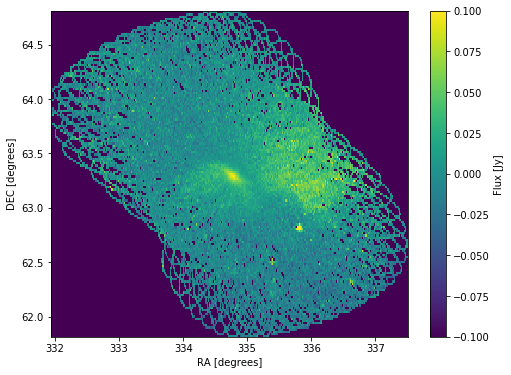

In [12]:
calibrated, meansub, ras, decs = get_data('C')
datamap, hits, rabins, decbins = naive_map(meansub, ras, decs, 300, 150)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = np.nan
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

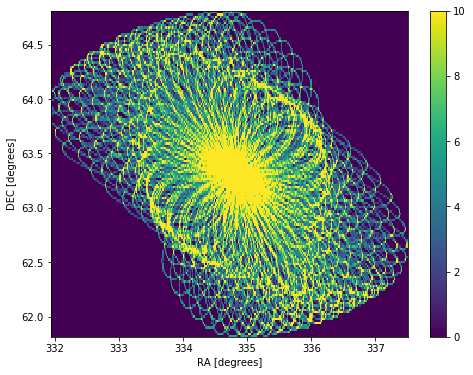

In [13]:
pc = pcolormesh(rabins, decbins, hits.T)
clim(0, 10)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

In [42]:
rc = 335.
dc = 63.38 

In [43]:
radius = np.sqrt( (ras-rc)**2 + (decs-dc)**2)
rmask = radius < 1.
annulus = (radius > 80./60.) & (radius < 2.)

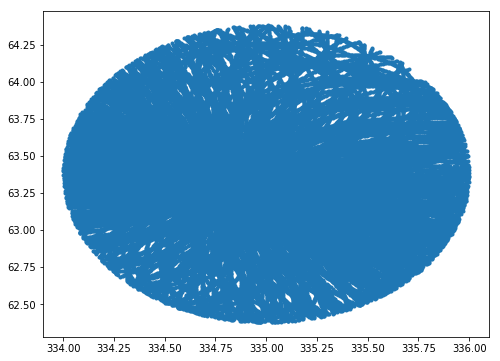

In [44]:
plot(ras[rmask], decs[rmask], '.')

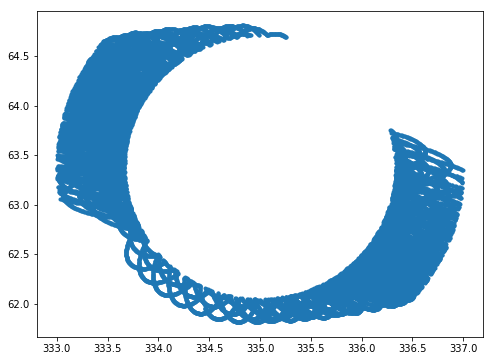

In [45]:
plot(ras[annulus], decs[annulus], '.')

In [46]:
calibrated, meansub, ras, decs = get_data('A')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


In [48]:
radius = np.sqrt( (ras-rc)**2 + (decs-dc)**2)
rmask = radius < 1.
datamap, hits, rabins, decbins = naive_map(calibrated[rmask], ras[rmask], decs[rmask], 120, 120)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = np.nan

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


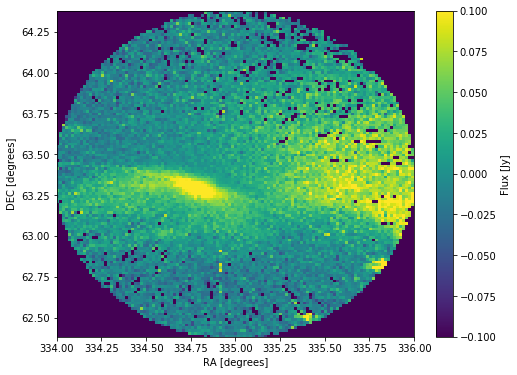

In [49]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [50]:
annulus = (radius > 80./60.) & (radius < 2.)
datamap, hits, rabins, decbins = naive_map(calibrated[annulus], ras[annulus], decs[annulus], 240, 240)
mask = hits == 0
nullA = datamap / hits
nullA[mask] = np.nan

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


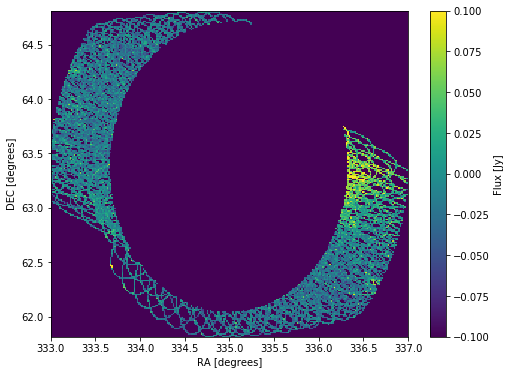

In [51]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, nullA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [52]:
print np.nansum(signalA)

166.301935248


In [53]:
print np.nansum(signalA - np.nanmedian(nullA))

301.753728481


In [54]:
np.nanmedian(nullA)

-0.012515180008573885

In [55]:
beam1arcmin = ( (1./60.) * (np.pi / 180.) )**2

In [56]:
print beam1arcmin

8.46159499408e-08


In [57]:
12.6 / 4.575

2.7540983606557377

In [58]:
actualbeam = ( (2.75/60.) * (np.pi / 180.) )**2

In [59]:
print beam1arcmin / actualbeam

0.132231404959


In [60]:
print ( np.nansum(signalA - np.nanmedian(nullA)) ) * beam1arcmin / actualbeam

39.9013194685


In [73]:
print ( np.nansum(signalA) ) * beam1arcmin / actualbeam

29.1922273449


In [81]:
40.1, 38.6, 39.8

(40.1, 38.6, 39.8)

In [85]:
calibrated, meansub, ras, decs = get_data('C')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater


In [86]:
radius = np.sqrt( (ras-rc)**2 + (decs-dc)**2)
rmask = radius < 1.
datamap, hits, rabins, decbins = naive_map(calibrated[rmask], ras[rmask], decs[rmask], 120, 120)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = np.nan
annulus = (radius > 80./60.) & (radius < 2.)
datamap, hits, rabins, decbins = naive_map(calibrated[annulus], ras[annulus], decs[annulus], 240, 240)
mask = hits == 0
nullA = datamap / hits
nullA[mask] = np.nan

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide


In [87]:
print 12.6 / 4.575
print 12.6 / 5.625
print 12.6 / 6.125

2.75409836066
2.24
2.05714285714


In [88]:
actualbeam = ( (2.0/60.) * (np.pi / 180.) )**2

In [89]:
print ( np.nansum(signalA)) * beam1arcmin / actualbeam

29.1922273449


In [90]:
22.0, 22.0, 29.2

(22.0, 22.0, 29.2)

In [72]:
39.9, 38.7, 39.9

(39.9, 38.7, 39.9)